<a href="https://colab.research.google.com/github/phyllo311/Mobility-and-Covid-19/blob/main/Finland_Mobility_and_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip -q install boto3
# first run usually get error, refresh Colab page and run installation again, it should be fine

In [4]:
!pip install pmdarima

In [5]:
import boto3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import urllib, json
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning:

urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!



In [ ]:
#pd.set_option('max_rows', 99999)
#pd.set_option('max_colwidth', 400)
#pd.describe_option('max_colwidth')

In [6]:
def jsonNorm(url):
  url = url
  response = urllib.request.urlopen(url)
  dat = json.loads(response.read())
  return dat

In [ ]:
#this dataset reports  by confirmed, death, recovered patient separately by ID, need to count obs
#url = "https://w3qa5ydb4l.execute-api.eu-west-1.amazonaws.com/prod/finnishCoronaData/v2
#dat1 = jsonNorm(url)

In [ ]:
#confirmed = pd.DataFrame.from_dict(pd.json_normalize(dat1["confirmed"]))
#confirmed.head()

In [ ]:
#deaths = pd.DataFrame.from_dict(pd.json_normalize(dat["deaths"]))
#display(deaths)

In [ ]:
#deaths["date"] = pd.to_datetime(deaths["date"]).dt.date
#deaths.head()

In [ ]:
#recovered = pd.DataFrame.from_dict(pd.json_normalize(dat["recovered"]))
#display(recovered)

# FINLAND HOSPITALIZED DATA

https://github.com/HS-Datadesk/koronavirus-avoindata#direct-interface-to-hs-data
- Daily hospitalized, inWard, inICU
- Cumsum Deaths

In [7]:
url = "https://w3qa5ydb4l.execute-api.eu-west-1.amazonaws.com/prod/finnishCoronaHospitalData"
data2 = jsonNorm(url)

In [8]:
data2.keys()

dict_keys(['hospitalised'])

In [9]:
df = pd.DataFrame.from_dict(pd.json_normalize(data2, record_path=['hospitalised']))
display(df)

,date,area,totalHospitalised,inWard,inIcu,dead
0,2020-03-21T13:00:00.000Z,HYKS,0,0,0,1
1,2020-03-21T13:00:00.000Z,Finland,0,0,0,1
2,2020-03-25T13:00:00.000Z,HYKS,63,45,18,2
3,2020-03-25T13:00:00.000Z,KYS,6,3,3,0
4,2020-03-25T13:00:00.000Z,OYS,4,3,1,0
...,...,...,...,...,...,...
1674,2021-06-16T10:58:00.000Z,KYS,2,2,0,85
1675,2021-06-16T10:58:00.000Z,OYS,6,5,1,62
1676,2021-06-16T10:58:00.000Z,TAYS,10,7,3,104
1677,2021-06-16T10:58:00.000Z,TYKS,4,3,1,103


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.dtypes

date                 object
area                 object
totalHospitalised     int64
inWard                int64
inIcu                 int64
dead                  int64
dtype: object

In [12]:
df["date"] = pd.to_datetime(df["date"]).dt.date

In [13]:
#check hospital areas
pd.unique(df["area"])

array(['HYKS', 'Finland', 'KYS', 'OYS', 'TAYS', 'TYKS', 'Other than HYKS'],
      dtype=object)

In [14]:
df.head()

,date,area,totalHospitalised,inWard,inIcu,dead
0,2020-03-21,HYKS,0,0,0,1
1,2020-03-21,Finland,0,0,0,1
2,2020-03-25,HYKS,63,45,18,2
3,2020-03-25,KYS,6,3,3,0
4,2020-03-25,OYS,4,3,1,0


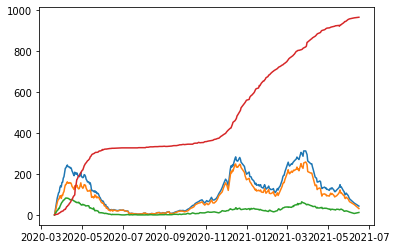

In [15]:
FI = df[(df.area == "Finland")] # & (df.date != "2020-03-21") & (df.date != "2020-03-26")]
plt.plot(FI["date"], FI["totalHospitalised"], FI["date"], FI["inWard"], FI["date"], FI["inIcu"], FI["date"], FI["dead"])

In [16]:
#exclude the date 21 and 26 March to make the datetime data correspondent to that of other regions
df['date'] = pd.to_datetime(df['date'])
HYKS = df[(df.area == "HYKS") & (df.date != "2020-03-21") & (df.date != "2020-03-26")]
HYKS

,date,area,totalHospitalised,inWard,inIcu,dead
2,2020-03-25,HYKS,63,45,18,2
11,2020-03-27,HYKS,81,57,24,6
17,2020-03-28,HYKS,83,60,23,7
23,2020-03-29,HYKS,99,69,30,9
29,2020-03-30,HYKS,108,70,38,10
...,...,...,...,...,...,...
1649,2021-05-28,HYKS,47,35,12,604
1655,2021-05-31,HYKS,37,28,9,606
1661,2021-06-02,HYKS,31,23,8,608
1667,2021-06-09,HYKS,28,24,4,611


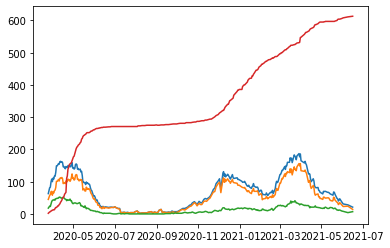

In [17]:
plt.plot(HYKS["date"],HYKS["totalHospitalised"], HYKS["date"],HYKS["inWard"],HYKS["date"],HYKS["inIcu"],HYKS["date"],HYKS["dead"])

In [18]:
import plotly.express as px

In [19]:
dftest = df[(df.date != "2020-03-21") & (df.date != "2020-03-26")]
dftest

,date,area,totalHospitalised,inWard,inIcu,dead
2,2020-03-25,HYKS,63,45,18,2
3,2020-03-25,KYS,6,3,3,0
4,2020-03-25,OYS,4,3,1,0
5,2020-03-25,TAYS,7,7,0,1
6,2020-03-25,TYKS,2,2,0,0
...,...,...,...,...,...,...
1674,2021-06-16,KYS,2,2,0,85
1675,2021-06-16,OYS,6,5,1,62
1676,2021-06-16,TAYS,10,7,3,104
1677,2021-06-16,TYKS,4,3,1,103


In [20]:
import plotly.express as px
figtest = px.area(dftest[(dftest.area != "Finland")], x = "date", 
                  y = "totalHospitalised", 
                  color = "area",
                  color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "Daily Total Hospitalized Covid patients")

figtest.show()

In [21]:
# animation plot
fig2 = px.scatter(dftest[(dftest.area != "Finland")], x = "totalHospitalised", 
                  y = "dead", 
                  animation_frame = dftest[(dftest.area != "Finland")]["date"].astype(str), 
                 # animation_group = "area",
                  size = "totalHospitalised", 
                  color = "area", 
                  hover_name = "area", 
                 #facet_col = "area",
                  #log_x = True,
                  #log_y = True,
                  #size_max = 45, 
                  range_x = [0,300], range_y = [-20,500]
                  )
fig2.update_layout(transition_duration=5)
fig2.update_layout(title = "Total Hospitalized vs Deaths by Covid in Finland",
xaxis = dict(title = 'Daily Hospitalized Patients'),
yaxis = dict(title = "Cumulative Deaths"))
fig2.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 300
fig2.show()

In [22]:
#CHECK MISSING VALUES: NO MISSING VALUES
print(df.isnull().sum())

date                 0
area                 0
totalHospitalised    0
inWard               0
inIcu                0
dead                 0
dtype: int64


In [23]:
print(df[df['date'] == '2020-06-19'])

Empty DataFrame
Columns: [date, area, totalHospitalised, inWard, inIcu, dead]
Index: []


In [24]:
# CHECK DATE CONTINUITY:  DF HAS 128 DAYS NOT REPORTED
df['date'] = pd.to_datetime(df['date'])
min(df['date'])
max(df['date'])
date_lst = pd.date_range(start = min(df['date']) , end = max(df['date']))
no_date = date_lst.difference(df['date'])
no_date

DatetimeIndex(['2020-03-22', '2020-03-23', '2020-03-24', '2020-06-18',
               '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-23',
               '2020-06-25', '2020-06-27',
               ...
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15'],
              dtype='datetime64[ns]', length=172, freq=None)

# CONFIRMED PATIENTS (THL DATA)

In [25]:
# confirmed cases by regions
url = "https://w3qa5ydb4l.execute-api.eu-west-1.amazonaws.com/prod/processedThlData"
dat3 = jsonNorm(url)

In [ ]:
#dat3["confirmed"].items()

In [26]:
df3 = pd.json_normalize(dat3["confirmed"]["Ahvenanmaa"])
df3

,value,healthCareDistrict,date
0,0,Ahvenanmaa,2020-01-01T15:00:00.000Z
1,0,Ahvenanmaa,2020-01-02T15:00:00.000Z
2,0,Ahvenanmaa,2020-01-03T15:00:00.000Z
3,0,Ahvenanmaa,2020-01-04T15:00:00.000Z
4,0,Ahvenanmaa,2020-01-05T15:00:00.000Z
...,...,...,...
529,0,Ahvenanmaa,2021-06-13T15:00:00.000Z
530,0,Ahvenanmaa,2021-06-14T15:00:00.000Z
531,2,Ahvenanmaa,2021-06-15T15:00:00.000Z
532,0,Ahvenanmaa,2021-06-16T15:00:00.000Z


In [27]:
lst = ('Ahvenanmaa', 'Varsinais-Suomi', 'Satakunta', 'Kanta-Häme',
                                   'Pirkanmaa','Päijät-Häme','Kymenlaakso','Etelä-Karjala','Etelä-Savo',
                                   'Itä-Savo','Pohjois-Karjala','Pohjois-Savo','Keski-Suomi', 'Etelä-Pohjanmaa',
                                   'Vaasa', 'Keski-Pohjanmaa', 'Pohjois-Pohjanmaa', 'Kainuu', 'Länsi-Pohja', 
                                   'Lappi', 'HUS', 'Kaikki sairaanhoitopiirit')

cfm = pd.DataFrame()
for i in lst:
  temp = pd.json_normalize(dat3["confirmed"][i])
  cfm = cfm.append(temp, ignore_index=True)

In [28]:
cfm["date"] = pd.to_datetime(cfm["date"]).dt.date

In [29]:
pd.unique(cfm['healthCareDistrict'])

array(['Ahvenanmaa', 'Varsinais-Suomi', 'Satakunta', 'Kanta-Häme',
       'Pirkanmaa', 'Päijät-Häme', 'Kymenlaakso', 'Etelä-Karjala',
       'Etelä-Savo', 'Itä-Savo', 'Pohjois-Karjala', 'Pohjois-Savo',
       'Keski-Suomi', 'Etelä-Pohjanmaa', 'Vaasa', 'Keski-Pohjanmaa',
       'Pohjois-Pohjanmaa', 'Kainuu', 'Länsi-Pohja', 'Lappi', 'HUS',
       'Kaikki sairaanhoitopiirit'], dtype=object)

In [30]:
#create a new column with hospital unit in correspondence with district region
cfm['hospital'] = cfm['healthCareDistrict']
cfm

,value,healthCareDistrict,date,hospital
0,0,Ahvenanmaa,2020-01-01,Ahvenanmaa
1,0,Ahvenanmaa,2020-01-02,Ahvenanmaa
2,0,Ahvenanmaa,2020-01-03,Ahvenanmaa
3,0,Ahvenanmaa,2020-01-04,Ahvenanmaa
4,0,Ahvenanmaa,2020-01-05,Ahvenanmaa
...,...,...,...,...
11743,36,Kaikki sairaanhoitopiirit,2021-06-13,Kaikki sairaanhoitopiirit
11744,67,Kaikki sairaanhoitopiirit,2021-06-14,Kaikki sairaanhoitopiirit
11745,56,Kaikki sairaanhoitopiirit,2021-06-15,Kaikki sairaanhoitopiirit
11746,31,Kaikki sairaanhoitopiirit,2021-06-16,Kaikki sairaanhoitopiirit


In [ ]:
# replace Finnish names of Districts by English versions similar to Google Mobility
#cfm['healthCareDistrict'] = cfm['healthCareDistrict'].replace(['Ahvenanmaa', 'Varsinais-Suomi', 'Päijät-Häme','Etelä-Karjala',
#                                                               'Etelä-Savo', 'Pohjois-Karjala','Pohjois-Savo','Keski-Suomi', 
 #                                                              'Etelä-Pohjanmaa', 'Keski-Pohjanmaa', 'Pohjois-Pohjanmaa', 'Lappi',
  #                                                             'HUS', 'Kaikki sairaanhoitopiirit',
   #                                                            'Länsi-Pohja', 'Vaasa', 'Itä-Savo'
    #                                                           ],
     #                                                         ['Aland', 'Southwest Finland', "Päijänne Tavastia",'South Karelia',
      #                                                         'Southern Savonia', 'North Karelia', 'Northern Savonia', 'Central Finland', 
       #                                                        'Southern Ostrobothnia', 'Central Ostrobothnia', 'Northern Ostrobothnia', 'Lapland',
        #                                                       'Uusimaa', 'Finland',
         #                                                      'Lapland', 'Ostrobothnia','Southern Savonia'
          #                                                    ])


In [31]:
# Change Finnish name of regions to English
# in correspondent to Google Mobility
di0 = {'Ahvenanmaa' : 'Aland', 
       'Varsinais-Suomi' : 'Southwest Finland', 
       'Satakunta' : 'Satakunta', 
       'Kanta-Häme' : 'Tavastia Proper',
       'Pirkanmaa' : 'Pirkanmaa', 
       'Päijät-Häme' : 'Päijänne Tavastia', 
       'Kymenlaakso' : 'Kymenlaakso', 
       'Etelä-Karjala' : 'South Karelia',
       'Etelä-Savo' : 'Southern Savonia', 
       'Itä-Savo' : 'Southern Savonia', 
       'Pohjois-Karjala' : 'North Karelia', 
       'Pohjois-Savo' : 'Northern Savonia',
       'Keski-Suomi' : 'Central Finland', 
       'Etelä-Pohjanmaa' : 'Southern Ostrobothnia', 
       'Vaasa' : 'Ostrobothnia', 
       'Keski-Pohjanmaa' : 'Central Ostrobothnia',
       'Pohjois-Pohjanmaa' : 'Northern Ostrobothnia', 
       'Kainuu' : 'Kainuu', 
       'Länsi-Pohja' : 'Lapland', 
       'Lappi' : 'Lapland', 
       'HUS' : 'Uusimaa',
       'Kaikki sairaanhoitopiirit' : 'Finland'
}

cfm['healthCareDistrict']= cfm['healthCareDistrict'].map(di0).fillna(cfm['healthCareDistrict'])

In [32]:
cfm

,value,healthCareDistrict,date,hospital
0,0,Aland,2020-01-01,Ahvenanmaa
1,0,Aland,2020-01-02,Ahvenanmaa
2,0,Aland,2020-01-03,Ahvenanmaa
3,0,Aland,2020-01-04,Ahvenanmaa
4,0,Aland,2020-01-05,Ahvenanmaa
...,...,...,...,...
11743,36,Finland,2021-06-13,Kaikki sairaanhoitopiirit
11744,67,Finland,2021-06-14,Kaikki sairaanhoitopiirit
11745,56,Finland,2021-06-15,Kaikki sairaanhoitopiirit
11746,31,Finland,2021-06-16,Kaikki sairaanhoitopiirit


In [33]:
pd.unique(cfm['healthCareDistrict'])

array(['Aland', 'Southwest Finland', 'Satakunta', 'Tavastia Proper',
       'Pirkanmaa', 'Päijänne Tavastia', 'Kymenlaakso', 'South Karelia',
       'Southern Savonia', 'North Karelia', 'Northern Savonia',
       'Central Finland', 'Southern Ostrobothnia', 'Ostrobothnia',
       'Central Ostrobothnia', 'Northern Ostrobothnia', 'Kainuu',
       'Lapland', 'Uusimaa', 'Finland'], dtype=object)

In [34]:
# match region name to hospital unit AS IN HOSPITAL, VACCINATION DATA
di = {'HUS': 'HYKS',
  'Etelä-Karjala': 'HYKS',
  'Kymenlaakso': 'HYKS',
  'Päijät-Häme': 'HYKS',
  'Pohjois-Savo': 'KYS',
  'Etelä-Savo': 'KYS',
  'Itä-Savo': 'KYS',
  'Keski-Suomi': 'KYS',
  'Pohjois-Karjala': 'OYS',
  'Pohjois-Pohjanmaa': 'OYS',
  'Kainuu': 'OYS',
  'Keski-Pohjanmaa': 'OYS',
  'Lappi': 'OYS',
  'Länsi-Pohja': 'OYS',
  'Pirkanmaa': 'TAYS',
  'Etelä-Pohjanmaa': 'TAYS',
  'Kanta-Häme': 'TAYS',
  'Varsinais-Suomi': 'TYKS',
  'Satakunta': 'TYKS',
  'Vaasa': 'TYKS',
  'Ahvenanmaa': 'Ahvenanmaa',
  'Kaikki sairaanhoitopiirit' : 'Finland'
}

cfm['hospital']= cfm['hospital'].map(di).fillna(cfm['hospital'])

In [35]:
#check random row
cfm

,value,healthCareDistrict,date,hospital
0,0,Aland,2020-01-01,Ahvenanmaa
1,0,Aland,2020-01-02,Ahvenanmaa
2,0,Aland,2020-01-03,Ahvenanmaa
3,0,Aland,2020-01-04,Ahvenanmaa
4,0,Aland,2020-01-05,Ahvenanmaa
...,...,...,...,...
11743,36,Finland,2021-06-13,Finland
11744,67,Finland,2021-06-14,Finland
11745,56,Finland,2021-06-15,Finland
11746,31,Finland,2021-06-16,Finland


In [36]:
cfm.rename(columns= {'value' : 'confirmed'}, inplace=True)
cfm

,confirmed,healthCareDistrict,date,hospital
0,0,Aland,2020-01-01,Ahvenanmaa
1,0,Aland,2020-01-02,Ahvenanmaa
2,0,Aland,2020-01-03,Ahvenanmaa
3,0,Aland,2020-01-04,Ahvenanmaa
4,0,Aland,2020-01-05,Ahvenanmaa
...,...,...,...,...
11743,36,Finland,2021-06-13,Finland
11744,67,Finland,2021-06-14,Finland
11745,56,Finland,2021-06-15,Finland
11746,31,Finland,2021-06-16,Finland


In [37]:
# CHECK TREND SETTINGS WITH AREA PLOTS
import plotly.express as px
fig = px.area(cfm[(cfm.healthCareDistrict != "Finland")], x = "date", 
                  y = "confirmed", 
                  color = "healthCareDistrict",
              facet_col = "hospital",
               color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "Daily Confirmed New Covid-19 Cases")

fig.show()

In [38]:
# TREND SETTINGS WITH CUMULATIVE CONFIRMED CASES
import plotly.express as px
fig = px.area(cfm[(cfm.healthCareDistrict != "Finland")], x = "date", 
                  y = cfm[(cfm.healthCareDistrict != "Finland")]["confirmed"].cumsum(), 
                  color = "healthCareDistrict",
              facet_col = "hospital",
               color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "Daily Confirmed New Covid-19 Cases")

fig.show()

In [39]:
#check missing values: NO NA
print(cfm.isnull().sum())

confirmed             0
healthCareDistrict    0
date                  0
hospital              0
dtype: int64


In [40]:
# CHECK DATE CONTINUITY:  DATE OF CONFIRMED DATA IS CONTINUOUS
cfm['date'] = pd.to_datetime(cfm['date'])
min(cfm['date'])
max(cfm['date'])
date_lst = pd.date_range(start = min(cfm['date']) , end = max(cfm['date']))
date_lst.difference(cfm['date'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [41]:
cfm.describe()

,confirmed
count,11748.000000
mean,16.016513
std,63.609522
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,892.000000


# VACCINATION DATA

In [42]:
#vaccination data
url = "https://w3qa5ydb4l.execute-api.eu-west-1.amazonaws.com/prod/finnishVaccinationData"
dat3 = jsonNorm(url)

In [43]:
df3 = pd.DataFrame.from_dict(pd.json_normalize(dat3))
df3

,area,date,shots
0,TYKS,2020-12-26T12:00:00.000Z,0
1,HYKS,2020-12-26T12:00:00.000Z,0
2,TAYS,2020-12-26T12:00:00.000Z,0
3,KYS,2020-12-26T12:00:00.000Z,0
4,OYS,2020-12-26T12:00:00.000Z,0
...,...,...,...
1213,TAYS,2021-06-17T12:00:00.000Z,459728
1214,KYS,2021-06-17T12:00:00.000Z,423120
1215,OYS,2021-06-17T12:00:00.000Z,369723
1216,Other areas,2021-06-17T12:00:00.000Z,3518


In [44]:
df3.dtypes

area     object
date     object
shots     int64
dtype: object

In [45]:
pd.unique(df3['area'])

array(['TYKS', 'HYKS', 'TAYS', 'KYS', 'OYS', 'Other areas', 'Finland'],
      dtype=object)

In [46]:
pd.unique(df3['date'])

array(['2020-12-26T12:00:00.000Z', '2020-12-27T12:00:00.000Z',
       '2020-12-28T12:00:00.000Z', '2020-12-29T12:00:00.000Z',
       '2020-12-30T12:00:00.000Z', '2020-12-31T12:00:00.000Z',
       '2021-01-01T12:00:00.000Z', '2021-01-02T12:00:00.000Z',
       '2021-01-03T12:00:00.000Z', '2021-01-04T12:00:00.000Z',
       '2021-01-05T12:00:00.000Z', '2021-01-06T12:00:00.000Z',
       '2021-01-07T12:00:00.000Z', '2021-01-08T12:00:00.000Z',
       '2021-01-09T12:00:00.000Z', '2021-01-10T12:00:00.000Z',
       '2021-01-11T12:00:00.000Z', '2021-01-12T12:00:00.000Z',
       '2021-01-13T12:00:00.000Z', '2021-01-14T12:00:00.000Z',
       '2021-01-15T12:00:00.000Z', '2021-01-16T12:00:00.000Z',
       '2021-01-17T12:00:00.000Z', '2021-01-18T12:00:00.000Z',
       '2021-01-19T12:00:00.000Z', '2021-01-20T12:00:00.000Z',
       '2021-01-21T12:00:00.000Z', '2021-01-22T12:00:00.000Z',
       '2021-01-23T12:00:00.000Z', '2021-01-24T12:00:00.000Z',
       '2021-01-25T12:00:00.000Z', '2021-01-26T12:00:00

In [47]:
fig_vaccine = px.area(df3[(df3.area != "Finland")], x = "date", 
                  y = "shots", 
                  color = "area",
                  title = "Daily Vacccination")

fig_vaccine.show()

In [48]:
#check missing values : NO NA
print(df3.isnull().sum())

area     0
date     0
shots    0
dtype: int64


In [ ]:
#check outliers: from plot it seems no outlier

In [49]:
# CHECK DATE CONTINUITY:  DATE OF VACCINATION DATA IS CONTINUOUS
df3['date'] = pd.to_datetime(df3['date'])
min(df3['date'])
max(df3['date'])
date_lst = pd.date_range(start = min(df3['date']) , end = max(df3['date']))
date_lst.difference(df3['date'])

DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)

# GOOGLE MOBILITY DATA

In [ ]:
# Download directly from link
#!wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

In [ ]:
#!unzip Region_Mobility_Report_CSVs.zip

In [ ]:
#from google.colab import files from local computer
#uploaded = files.upload()
#import io
#mobility = pd.read_csv(io.BytesIO(uploaded['2020_FI_Region_Mobility_Report.csv']))
#mobility.head()

In [50]:
#Read file from google drive
from google.colab import drive
drive.mount('/content/drive')  #get authentication code to drive

Mounted at /content/drive


In [51]:
import os
os.chdir("drive/My Drive/Colab Notebooks")
os.listdir() # link to Colab Notebook folder in GG Drive

['README.md',
 'sales_data.csv',
 'Exercises_1.ipynb',
 'chinook.db',
 'Exercises_2.ipynb',
 'sakila.db',
 'Lecture_2.ipynb',
 '2020_FI_Region_Mobility_Report.csv',
 'Freecodecamp Tutorial 1 - .ipynb',
 'Lecture_1.ipynb',
 'Untitled0.ipynb',
 'Market Basket Analysis - Association Rule.ipynb',
 'Covid-19 and Mobility - Regression Model.ipynb',
 'fi_countryAgg_82features.csv',
 'Untitled1.ipynb',
 'bacQ.csv',
 'Untitled2.ipynb',
 'Finland Mobility and Covid-19.ipynb']

In [52]:
mobil = pd.read_csv("2020_FI_Region_Mobility_Report.csv")
#mobil

In [53]:
type(mobil)

pandas.core.frame.DataFrame

In [54]:
mobil.dtypes

country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                           object
metro_area                                            float64
iso_3166_2_code                                        object
census_fips_code                                      float64
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [55]:
# fill NA of sub_region_1 with Finland
mobil['sub_region_1'].fillna('Finland', inplace = True)

In [56]:
pd.unique(mobil["sub_region_1"])

array(['Finland', 'Central Finland', 'Central Ostrobothnia', 'Kainuu',
       'Kymenlaakso', 'Lapland', 'North Karelia', 'Northern Ostrobothnia',
       'Northern Savonia', 'Ostrobothnia', 'Päijänne Tavastia',
       'Pirkanmaa', 'Satakunta', 'South Karelia', 'Southern Ostrobothnia',
       'Southern Savonia', 'Southwest Finland', 'Tavastia Proper',
       'Uusimaa'], dtype=object)

In [57]:
pd.unique(mobil["date"])

array(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-

In [58]:
mobil.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [59]:
# Select rows that meet condition sub_region_1 == NaN (getting whole Finland data) OR ISO code # NA (getting only sub_region_1 data)
mobil['iso_3166_2_code'] = mobil['iso_3166_2_code'].fillna(np.nan)
mobil = mobil[(mobil['sub_region_1'] == 'Finland') | (mobil['iso_3166_2_code'].notnull())]

In [60]:
mobil1 = mobil.drop(['country_region','country_region_code', 'sub_region_2', 
                     'metro_area', 'iso_3166_2_code', 'census_fips_code'], axis = 1)

In [61]:
# rename mobility columns

mobil1.rename(columns = {'sub_region_1' : 'region',
                         'retail_and_recreation_percent_change_from_baseline' : 'retail',
                         'grocery_and_pharmacy_percent_change_from_baseline':'groc_phar', 
                         'parks_percent_change_from_baseline' : 'park', 
                         'transit_stations_percent_change_from_baseline': 'transit', 
                         'workplaces_percent_change_from_baseline' : 'work', 
                         'residential_percent_change_from_baseline' : 'resident'},
              inplace = True
              )

In [62]:
pd.unique(mobil1["region"])

array(['Finland', 'Central Finland', 'Central Ostrobothnia', 'Kainuu',
       'Kymenlaakso', 'Lapland', 'North Karelia', 'Northern Ostrobothnia',
       'Northern Savonia', 'Ostrobothnia', 'Päijänne Tavastia',
       'Pirkanmaa', 'Satakunta', 'South Karelia', 'Southern Ostrobothnia',
       'Southern Savonia', 'Southwest Finland', 'Tavastia Proper',
       'Uusimaa'], dtype=object)

In [63]:
#CHECK MISSING VALUES
print(mobil1.isnull().sum())

region          0
date            0
retail        310
groc_phar     162
park         3061
transit       887
work          100
resident      327
dtype: int64


In [64]:
#split missing data by region
mobil1.isnull().groupby(mobil1.region).sum().astype(int)

,region,date,retail,groc_phar,park,transit,work,resident
region,,,,,,,,
Central Finland,0,0,3,0,32,25,6,0
Central Ostrobothnia,0,0,21,19,337,238,16,97
Finland,0,0,0,0,0,0,0,0
Kainuu,0,0,26,19,288,196,18,97
Kymenlaakso,0,0,25,7,135,25,6,3
Lapland,0,0,25,3,25,25,6,0
North Karelia,0,0,22,19,240,138,3,31
Northern Ostrobothnia,0,0,0,0,94,6,0,0
Northern Savonia,0,0,21,0,63,26,6,0


In [65]:
#show missing data
mobil1[mobil1.isnull().any(axis=1)]

,region,date,retail,groc_phar,park,transit,work,resident
467,Central Finland,2020-06-18,16.0,54.0,NaN,21.0,-45.0,-2.0
468,Central Finland,2020-06-19,-44.0,-8.0,NaN,-45.0,-78.0,4.0
471,Central Finland,2020-06-22,9.0,19.0,NaN,-6.0,-48.0,1.0
494,Central Finland,2020-07-15,12.0,13.0,NaN,13.0,-53.0,1.0
495,Central Finland,2020-07-16,7.0,12.0,NaN,4.0,-53.0,1.0
...,...,...,...,...,...,...,...,...
25161,Uusimaa,2020-09-03,-14.0,-2.0,NaN,-37.0,-36.0,6.0
25162,Uusimaa,2020-09-04,-13.0,-4.0,NaN,-35.0,-35.0,5.0
25165,Uusimaa,2020-09-07,-9.0,-2.0,NaN,-34.0,-36.0,6.0
25167,Uusimaa,2020-09-09,-10.0,-3.0,NaN,-35.0,-33.0,7.0


# Mobil missing values handling

In [ ]:
# missing values
#new column week = starting day of week
#for column retail to resident
#for in in range len(df mobil)
#group data by region, week
#check if there exists missing data in weekly group, if Y then replace with weekly mean, N: pass
#fill missing values group by regional means and by week

In [66]:
sub_mobil = mobil1[(mobil1.region == "Finland") | (mobil1.region == "Uusimaa") | (mobil1.region == "Northern Ostrobothnia")]
sub_mobil.head()

,region,date,retail,groc_phar,park,transit,work,resident
0,Finland,2020-02-15,3.0,0.0,-11.0,0.0,-2.0,0.0
1,Finland,2020-02-16,-3.0,-2.0,-24.0,-8.0,-3.0,1.0
2,Finland,2020-02-17,3.0,2.0,10.0,-10.0,-13.0,2.0
3,Finland,2020-02-18,2.0,2.0,22.0,-9.0,-13.0,2.0
4,Finland,2020-02-19,4.0,1.0,34.0,-8.0,-13.0,1.0


In [67]:
sub_mobil.isnull().groupby(sub_mobil.region).sum().astype(int)

,region,date,retail,groc_phar,park,transit,work,resident
region,,,,,,,,
Finland,0,0,0,0,0,0,0,0
Northern Ostrobothnia,0,0,0,0,94,6,0,0
Uusimaa,0,0,0,0,18,0,0,0


In [68]:
sub_mobil["date1"] = pd.to_datetime(sub_mobil.loc[:,"date"], format='%Y-%m-%d')
sub_mobil["week"] = sub_mobil["date1"].apply(lambda x: x.week)
sub_mobil.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,region,date,retail,groc_phar,park,transit,work,resident,date1,week
0,Finland,2020-02-15,3.0,0.0,-11.0,0.0,-2.0,0.0,2020-02-15,7
1,Finland,2020-02-16,-3.0,-2.0,-24.0,-8.0,-3.0,1.0,2020-02-16,7
2,Finland,2020-02-17,3.0,2.0,10.0,-10.0,-13.0,2.0,2020-02-17,8
3,Finland,2020-02-18,2.0,2.0,22.0,-9.0,-13.0,2.0,2020-02-18,8
4,Finland,2020-02-19,4.0,1.0,34.0,-8.0,-13.0,1.0,2020-02-19,8


In [69]:
#replace missing values with regional means
for i in range(2,8):
  sub_mobil.iloc[:,i] = sub_mobil.groupby(['region','week']).transform(lambda x: x.fillna(x.mean()))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
#drop unnecessary columns
sub_mobil.drop(['date1','week'], axis = 1, inplace=True)
sub_mobil.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,region,date,retail,groc_phar,park,transit,work,resident
0,Finland,2020-02-15,3.0,0.0,-11.0,0.0,-2.0,0.0
1,Finland,2020-02-16,-3.0,-2.0,-24.0,-8.0,-3.0,1.0
2,Finland,2020-02-17,3.0,2.0,10.0,-10.0,-13.0,2.0
3,Finland,2020-02-18,2.0,2.0,22.0,-9.0,-13.0,2.0
4,Finland,2020-02-19,4.0,1.0,34.0,-8.0,-13.0,1.0


In [71]:
#check number of missing values
sub_mobil.isnull().groupby(sub_mobil.region).sum().astype(int)

,region,date,retail,groc_phar,park,transit,work,resident
region,,,,,,,,
Finland,0,0,0,0,0,0,0,0
Northern Ostrobothnia,0,0,0,0,21,0,0,0
Uusimaa,0,0,0,0,0,0,0,0


In [72]:
#call rows with missing values, column Park has 3 consecutive weeks of missing values
sub_mobil[sub_mobil.isnull().any(axis=1)]

,region,date,retail,groc_phar,park,transit,work,resident
8467,Northern Ostrobothnia,2020-08-17,5.0,4.0,NaN,-17.0,-37.0,0.0
8468,Northern Ostrobothnia,2020-08-18,2.0,2.0,NaN,-16.0,-33.0,1.0
8469,Northern Ostrobothnia,2020-08-19,1.0,5.0,NaN,-14.0,-34.0,1.0
8470,Northern Ostrobothnia,2020-08-20,-4.0,3.0,NaN,-17.0,-35.0,0.0
8471,Northern Ostrobothnia,2020-08-21,-1.0,2.0,NaN,-12.0,-33.0,-1.0
8472,Northern Ostrobothnia,2020-08-22,-7.0,-3.0,NaN,-15.2,-2.0,-3.0
8473,Northern Ostrobothnia,2020-08-23,-3.0,4.0,NaN,-15.2,0.0,-3.0
8474,Northern Ostrobothnia,2020-08-24,2.0,2.0,NaN,-18.0,-32.0,1.0
8475,Northern Ostrobothnia,2020-08-25,-4.0,0.0,NaN,-20.0,-32.0,2.0
8476,Northern Ostrobothnia,2020-08-26,-1.0,2.0,NaN,-19.0,-30.0,3.0


In [ ]:
# plot mobil data for each regions
# CHECK TREND SETTINGS WITH AREA PLOTS
#fig_mobil = px.area(mobil1, x = "date", 
 #                 y = "retail", 
 #                 color = "healthCareDistrict",
 #             facet_col = "hospital",
 #              color_discrete_sequence=px.colors.qualitative.Pastel,
 #                 title = "Daily Confirmed New Covid-19 Cases")
#
#fig_mobil.show()

# Merging

In [ ]:
# MERGE HOSPITALIZED WITH CONFIRMED DATA - NOT REC
#cfm['hospital'] = cfm['hospital'].astype(str)
#df['area'] = df['area'].astype(str)
#cfm['date'] = pd.to_datetime(cfm['date'],format='%Y-%m-%d')
#df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#cfm_hos = pd.merge(cfm, df, how='left', left_on=['date','hospital'], right_on = ['date', 'area'])
#cfm_hos = cfm_hos.drop(['area'], axis = 1)
#cfm_hos.head()

In [ ]:
#print(cfm_hos[cfm_hos.isna().any(axis=1)])
#possibly some days of hospitalized are not reported

In [73]:
# MERGE Confirmed case WITH MOBILITY
cfm['healthCareDistrict'] = cfm['healthCareDistrict'].astype(str)
mobil1['region'] = mobil1['region'].astype(str)
cfm['date'] = pd.to_datetime(cfm['date'],format='%Y-%m-%d')
mobil1['date'] = pd.to_datetime(mobil1['date'], format='%Y-%m-%d')
mobil_cfm = pd.merge(cfm, mobil1, left_on=['date','healthCareDistrict'], right_on = ['date', 'region'])
mobil_cfm.head()

,confirmed,healthCareDistrict,date,hospital,region,retail,groc_phar,park,transit,work,resident
0,0,Southwest Finland,2020-02-15,TYKS,Southwest Finland,-5.0,-4.0,-27.0,-1.0,-2.0,0.0
1,0,Southwest Finland,2020-02-16,TYKS,Southwest Finland,-9.0,-10.0,-51.0,-12.0,-7.0,2.0
2,0,Southwest Finland,2020-02-17,TYKS,Southwest Finland,10.0,-1.0,15.0,-12.0,-31.0,3.0
3,0,Southwest Finland,2020-02-18,TYKS,Southwest Finland,6.0,-2.0,41.0,-9.0,-30.0,3.0
4,0,Southwest Finland,2020-02-19,TYKS,Southwest Finland,4.0,-3.0,35.0,-9.0,-30.0,3.0


In [74]:
mobil_cfm.isnull().groupby(mobil_cfm.region).sum().astype(int)

,confirmed,healthCareDistrict,date,hospital,region,retail,groc_phar,park,transit,work,resident
region,,,,,,,,,,,
Central Finland,0,0,0,0,0,3,0,32,25,6,0
Central Ostrobothnia,0,0,0,0,0,21,19,337,238,16,97
Finland,0,0,0,0,0,0,0,0,0,0,0
Kainuu,0,0,0,0,0,26,19,288,196,18,97
Kymenlaakso,0,0,0,0,0,25,7,135,25,6,3
Lapland,0,0,0,0,0,50,6,50,50,12,0
North Karelia,0,0,0,0,0,22,19,240,138,3,31
Northern Ostrobothnia,0,0,0,0,0,0,0,94,6,0,0
Northern Savonia,0,0,0,0,0,21,0,63,26,6,0


In [75]:
#Merge sub_mobil with Confirmed cases
cfm['healthCareDistrict'] = cfm['healthCareDistrict'].astype(str)
sub_mobil['region'] = sub_mobil['region'].astype(str)
cfm['date'] = pd.to_datetime(cfm['date'],format='%Y-%m-%d')
sub_mobil['date'] = pd.to_datetime(sub_mobil['date'], format='%Y-%m-%d')
mobil_cfm1 = pd.merge(cfm, sub_mobil, left_on=['date','healthCareDistrict'], right_on = ['date', 'region'])
mobil_cfm1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,confirmed,healthCareDistrict,date,hospital,region,retail,groc_phar,park,transit,work,resident
0,0,Northern Ostrobothnia,2020-02-15,OYS,Northern Ostrobothnia,9.0,5.0,26.0,13.0,-1.0,-1.0
1,0,Northern Ostrobothnia,2020-02-16,OYS,Northern Ostrobothnia,7.0,5.0,14.0,3.0,-2.0,0.0
2,0,Northern Ostrobothnia,2020-02-17,OYS,Northern Ostrobothnia,9.0,7.0,46.0,6.0,1.0,0.0
3,0,Northern Ostrobothnia,2020-02-18,OYS,Northern Ostrobothnia,8.0,4.0,49.0,2.0,1.0,1.0
4,0,Northern Ostrobothnia,2020-02-19,OYS,Northern Ostrobothnia,8.0,3.0,49.0,2.0,0.0,1.0


In [76]:
#drop healthCareDistrict column
mobil_cfm1.drop(['healthCareDistrict'], axis = 1, inplace=True)

In [77]:
mobil_cfm1.isnull().groupby(mobil_cfm1.region).sum().astype(int)

,confirmed,date,hospital,region,retail,groc_phar,park,transit,work,resident
region,,,,,,,,,,
Finland,0,0,0,0,0,0,0,0,0,0
Northern Ostrobothnia,0,0,0,0,0,0,21,0,0,0
Uusimaa,0,0,0,0,0,0,0,0,0,0


In [78]:
#### CHECK TREND SETTINGS WITH LINE PLOTS
#extract 

#transform wide to long data
mobil2 = mobil1.melt(id_vars= ['date','region'], 
        var_name= 'mobil_type',
         value_name= 'mobil_change')
mobil2.head()

,date,region,mobil_type,mobil_change
0,2020-02-15,Finland,retail,3.0
1,2020-02-16,Finland,retail,-3.0
2,2020-02-17,Finland,retail,3.0
3,2020-02-18,Finland,retail,2.0
4,2020-02-19,Finland,retail,4.0


In [79]:
fig3 = px.line(mobil2[(mobil2.region == "Finland")], x = "date", 
                  y = "mobil_change", 
                  color = "mobil_type", 
                  hover_name = "mobil_type"
               #facet_col= 'mobil_type'
                 #range_x = [0,1000], range_y = [-100,600]
                  )
fig3.update_layout(transition_duration=5, title = "Mobility Changes in Finland",
yaxis = dict(title = "Percent change in mobility"))

In [80]:
FI = mobil_cfm[(mobil_cfm.region == "Finland")]
fig3.add_trace(go.Scatter(x = FI['date'], y = FI['confirmed'], name="Confirmed cases"))
#label left up

In [81]:
# confirmed case plot
fig2 = px.scatter(dftest[(dftest.area != "Finland")], x = "totalHospitalised", 
                  y = "dead", 
                  animation_frame = dftest[(dftest.area != "Finland")]["date"].astype(str), 
                 # animation_group = "area",
                  size = "totalHospitalised", 
                  color = "area", 
                  hover_name = "area", 
                 #facet_col = "area",
                  #log_x = True,
                  #log_y = True,
                  #size_max = 45, 
                  range_x = [0,300], range_y = [-20,500]
                  )
fig2.update_layout(transition_duration=5)
fig2.update_layout(title = "Total Hospitalized vs Deaths by Covid in Finland",
xaxis = dict(title = 'Daily Hospitalized Patients'),
yaxis = dict(title = "Cumulative Deaths"))
fig2.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 300
fig2.show()

In [ ]:
### PLOT DAILY HOSPITAL / CONFIRMED CASES vs MOBILITY CHANGES FINLAND
#FI2 = mobil_cfm[(mobil_cfm.region == "Finland")].drop (['healthCareDistrict', 'region'], axis = 1 )
#FI2.dropna().plot(x='date', y=['confirmed', 'retail', 'groc_phar',	'park',	'transit',	'work',	'resident'])

In [82]:
#CHECK OUTLIERS BY SCATTER PLOTS
fig4 = px.line(sub_mobil, x = "date", 
                  y = "mobil_change", 
                  color = "mobil_type", 
                  hover_name = "mobil_type",
               facet_col= "region"
                 #range_x = [0,1000], range_y = [-100,600]
                  )
fig4.update_layout(transition_duration=5, title = "Mobility Changes in all regions of Finland",
yaxis = dict(title = "Percent change in mobility"))

ValueError: ignored

# Descriptive Analysis

In [ ]:
# plot

In [ ]:
# correlation matrix of Finland data
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(mobil_cfm1[(mobil_cfm1.region == "Finland")].corr(), annot=True)
plt.show()

In [ ]:
sns.pairplot(FI)

In [ ]:
# basic statistics
mobil_cfm1[(mobil_cfm1.region == "Finland")].describe()

In [ ]:
plt.plot(FI["date"], FI["GR"], FI["date"], FI["CMI6"])

# Modelling

In [84]:
# Finland data
FI = mobil_cfm1[(mobil_cfm1.region == "Uusimaa")]
FI['cumulative'] = np.cumsum(FI['confirmed']) #calculate cumulative cases
FI = FI[(FI['date'] >= '2020-02-25')] #limit data from 25 Feb 2020
FI.head(n=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,confirmed,date,hospital,region,retail,groc_phar,park,transit,work,resident,cumulative
353,0,2020-02-25,HYKS,Uusimaa,5.0,4.0,32.0,-1.0,1.0,1.0,1
354,0,2020-02-26,HYKS,Uusimaa,7.0,4.0,1.0,-4.0,1.0,1.0,1
355,1,2020-02-27,HYKS,Uusimaa,3.0,4.0,10.0,-3.0,1.0,1.0,2
356,3,2020-02-28,HYKS,Uusimaa,5.0,4.0,19.0,-5.0,0.0,1.0,5
357,1,2020-02-29,HYKS,Uusimaa,4.0,4.0,3.0,0.0,1.0,-1.0,6
358,1,2020-03-01,HYKS,Uusimaa,-4.0,-4.0,-32.0,-6.0,-2.0,1.0,7
359,0,2020-03-02,HYKS,Uusimaa,3.0,4.0,2.0,-5.0,0.0,1.0,7
360,3,2020-03-03,HYKS,Uusimaa,2.0,2.0,-11.0,-8.0,-1.0,1.0,10
361,2,2020-03-04,HYKS,Uusimaa,-3.0,-3.0,-24.0,-10.0,-1.0,2.0,12
362,1,2020-03-05,HYKS,Uusimaa,-1.0,4.0,-7.0,-8.0,-1.0,1.0,13


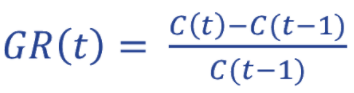



In [85]:
FI['GR'] = FI['cumulative'].pct_change()*100
FI['GR3'] = FI['cumulative'].pct_change(periods = 3)*100
FI['GR4'] = FI['cumulative'].pct_change(periods = 4)*100
FI['GR5'] = FI['cumulative'].pct_change(periods = 5)*100
FI['GR6'] = FI['cumulative'].pct_change(periods = 6)*100
FI['GR7'] = FI['cumulative'].pct_change(periods = 7)*100
FI['GR14'] = FI['cumulative'].pct_change(periods = 14)*100
#combined mobility index
FI['CMI4'] = FI[['retail', 'work', 'park', 'groc_phar']].mean(axis=1)
FI['CMI6'] = FI[['retail', 'work', 'park', 'groc_phar', 'transit', 'resident']].mean(axis=1)

In [86]:
FI.head(n=50)

,confirmed,date,hospital,region,retail,groc_phar,park,transit,work,resident,cumulative,GR,GR3,GR4,GR5,GR6,GR7,GR14,CMI4,CMI6
353,0,2020-02-25,HYKS,Uusimaa,5.0,4.0,32.0,-1.0,1.0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.50,7.000000
354,0,2020-02-26,HYKS,Uusimaa,7.0,4.0,1.0,-4.0,1.0,1.0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.25,1.666667
355,1,2020-02-27,HYKS,Uusimaa,3.0,4.0,10.0,-3.0,1.0,1.0,2,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.50,2.666667
356,3,2020-02-28,HYKS,Uusimaa,5.0,4.0,19.0,-5.0,0.0,1.0,5,150.000000,400.000000,NaN,NaN,NaN,NaN,NaN,7.00,4.000000
357,1,2020-02-29,HYKS,Uusimaa,4.0,4.0,3.0,0.0,1.0,-1.0,6,20.000000,500.000000,500.000000,NaN,NaN,NaN,NaN,3.00,1.833333
358,1,2020-03-01,HYKS,Uusimaa,-4.0,-4.0,-32.0,-6.0,-2.0,1.0,7,16.666667,250.000000,600.000000,600.000000,NaN,NaN,NaN,-10.50,-7.833333
359,0,2020-03-02,HYKS,Uusimaa,3.0,4.0,2.0,-5.0,0.0,1.0,7,0.000000,40.000000,250.000000,600.000000,600.000000,NaN,NaN,2.25,0.833333
360,3,2020-03-03,HYKS,Uusimaa,2.0,2.0,-11.0,-8.0,-1.0,1.0,10,42.857143,66.666667,100.000000,400.000000,900.000000,900.000000,NaN,-2.00,-2.500000
361,2,2020-03-04,HYKS,Uusimaa,-3.0,-3.0,-24.0,-10.0,-1.0,2.0,12,20.000000,71.428571,100.000000,140.000000,500.000000,1100.000000,NaN,-7.75,-6.500000
362,1,2020-03-05,HYKS,Uusimaa,-1.0,4.0,-7.0,-8.0,-1.0,1.0,13,8.333333,85.714286,85.714286,116.666667,160.000000,550.000000,NaN,-1.25,-2.000000


In [87]:
FI.isnull().sum().astype(int)

confirmed      0
date           0
hospital       0
region         0
retail         0
groc_phar      0
park           0
transit        0
work           0
resident       0
cumulative     0
GR             1
GR3            3
GR4            4
GR5            5
GR6            6
GR7            7
GR14          14
CMI4           0
CMI6           0
dtype: int64

In [88]:
FI.iloc[FI.values==np.inf]

,confirmed,date,hospital,region,retail,groc_phar,park,transit,work,resident,cumulative,GR,GR3,GR4,GR5,GR6,GR7,GR14,CMI4,CMI6


In [ ]:
# OLS mobility - confirmed cases for each region

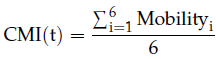

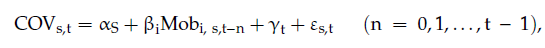

In [ ]:
#regression model for Finland: confirmed cases vs mobility

In [89]:
model = sm.formula.ols(formula = 'confirmed ~ retail	+ groc_phar	+ transit	+ work	+ resident', data= FI).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              confirmed   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     119.7
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.09e-71
Time:                        10:11:51   Log-Likelihood:                -1731.3
No. Observations:                 333   AIC:                             3475.
Df Residuals:                     327   BIC:                             3498.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.3723     11.803     -3.929      0.000     -69.591     -23.153
retail         7.0663      0.478     14.795      0.000       6.127       8.006
groc_phar     -2.5893      0.430     -6.028      0.000      -3.434      -1.744
transit       -6.7374      0.509    -13.224      0.000      -7.740      -5.735
work           3.6715      0.193     18.977      0.000       3.291       4.052
resident      11.9267      0.675     17.679      0.000      10.600      13.254
==============================================================================
Omnibus:                       62.950   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.281
Skew:                           1.087   Prob(JB):                     1.38e-23
Kurtosis:                       4.692   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# initiate df for modelling, lag n = 7
X1 = FI[['retail', 'groc_phar', 'transit', 'work', 'resident']].shift(7)
X1 = sm.add_constant(X1)
y1 = FI['confirmed']
mlag7 = sm.OLS(y1, X1, missing= 'drop')
mlag7 = mlag7.fit()
mlag7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              confirmed   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     101.1
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.08e-63
Time:                        10:11:56   Log-Likelihood:                -1710.1
No. Observations:                 326   AIC:                             3432.
Df Residuals:                     320   BIC:                             3455.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3975     12.405     -1.161      0.247     -38.804      10.009
retail         7.0597      0.503     14.045      0.000       6.071       8.049
groc_phar     -3.3444      0.453     -7.382      0.000      -4.236      -2.453
transit       -5.8182      0.537    -10.842      0.000      -6.874      -4.762
work           3.7253      0.206     18.126      0.000       3.321       4.130
resident      12.6693      0.715     17.720      0.000      11.263      14.076
==============================================================================
Omnibus:                       63.225   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.509
Skew:                           1.100   Prob(JB):                     4.52e-24
Kurtosis:                       4.753   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
model = sm.formula.ols(formula = 'GR4 ~ retail	+ groc_phar	+ transit	+ work	+ resident + park', data= FI).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GR4   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     40.31
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.66e-36
Time:                        10:12:00   Log-Likelihood:                -1746.2
No. Observations:                 329   AIC:                             3506.
Df Residuals:                     322   BIC:                             3533.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    230.6817     14.693     15.700      0.000     201.776     259.587
retail        -5.4210      0.557     -9.739      0.000      -6.516      -4.326
groc_phar      2.1323      0.485      4.394      0.000       1.178       3.087
transit        8.3113      0.607     13.684      0.000       7.116       9.506
work          -0.7731      0.322     -2.399      0.017      -1.407      -0.139
resident       2.2851      1.188      1.924      0.055      -0.051       4.622
park          -0.1929      0.069     -2.781      0.006      -0.329      -0.056
==============================================================================
Omnibus:                      309.796   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9578.670
Skew:                           3.868   Prob(JB):                         0.00
Kurtosis:                      28.277   Cond. No.                         524.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
model = sm.formula.ols(formula = 'GR4 ~ retail	+ groc_phar	+ transit	+ work	+ park', data= FI).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GR4   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     47.24
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.39e-36
Time:                        10:12:04   Log-Likelihood:                -1748.1
No. Observations:                 329   AIC:                             3508.
Df Residuals:                     323   BIC:                             3531.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    227.2946     14.648     15.517      0.000     198.478     256.112
retail        -5.7737      0.528    -10.940      0.000      -6.812      -4.735
groc_phar      2.4391      0.460      5.300      0.000       1.534       3.345
transit        8.1943      0.607     13.503      0.000       7.000       9.388
work          -1.2886      0.180     -7.165      0.000      -1.642      -0.935
park          -0.2947      0.045     -6.544      0.000      -0.383      -0.206
==============================================================================
Omnibus:                      305.638   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9177.664
Skew:                           3.796   Prob(JB):                         0.00
Kurtosis:                      27.735   Cond. No.                         520.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# initiate df for modelling, lag n = 7
X1 = FI[['retail', 'transit', 'resident', 'park']].shift(3)
X1 = sm.add_constant(X1)
y1 = FI['GR5']
mlag7 = sm.OLS(y1, X1, missing= 'drop')
mlag7 = mlag7.fit()
mlag7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GR5   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     82.62
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           3.13e-48
Time:                        10:12:08   Log-Likelihood:                -1798.0
No. Observations:                 328   AIC:                             3606.
Df Residuals:                     323   BIC:                             3625.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        313.1592     16.303     19.209      0.000     281.086     345.233
retail        -4.9475      0.460    -10.765      0.000      -5.852      -4.043
transit       10.6344      0.661     16.088      0.000       9.334      11.935
resident       6.8359      0.772      8.858      0.000       5.318       8.354
park          -0.0929      0.055     -1.704      0.089      -0.200       0.014
==============================================================================
Omnibus:                      226.439   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2966.912
Skew:                           2.708   Prob(JB):                         0.00
Kurtosis:                      16.703   Cond. No.                         467.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
X1 = FI[['retail', 'transit', 'work', 'resident', 'park']].shift(5)
X1 = sm.add_constant(X1)
y1 = FI['GR4']
mlag7 = sm.OLS(y1, X1, missing= 'drop')
mlag7 = mlag7.fit()
mlag7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GR4   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     52.56
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           8.97e-40
Time:                        10:12:11   Log-Likelihood:                -1705.1
No. Observations:                 328   AIC:                             3422.
Df Residuals:                     322   BIC:                             3445.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        202.0792     11.957     16.901      0.000     178.556     225.602
retail        -3.1900      0.377     -8.461      0.000      -3.932      -2.448
transit        6.8626      0.499     13.758      0.000       5.881       7.844
work          -0.0139      0.270     -0.051      0.959      -0.545       0.518
resident       4.3382      0.993      4.370      0.000       2.385       6.291
park          -0.0487      0.061     -0.793      0.429      -0.170       0.072
==============================================================================
Omnibus:                      367.689   Durbin-Watson:                   0.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20833.318
Skew:                           4.865   Prob(JB):                         0.00
Kurtosis:                      40.812   Cond. No.                         475.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OLS

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['fi_countryAgg_82features.csv']))
#df2

In [95]:
df = pd.read_csv("fi_countryAgg_82features.csv")
df.head()

,Unnamed: 0,date,new_confirmed,new_deceased,total_confirmed,total_deceased,total_tested,population,population_male,population_female,rural_population,urban_population,largest_city_population,clustered_population,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_89,population_age_90_99,population_age_80_and_older,gdp,gdp_per_capita,human_capital_index,open_street_maps,latitude,longitude,area,rural_area,urban_area,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,...,hospital_beds,nurses,physicians,health_expenditure,out_of_pocket_health_expenditure,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,dew_point,relative_humidity,infection_rate
0,0,2020-01-01,0.0,0.0,0.0,0.0,463.714286,5517919.0,2723290.0,2794629.0,803426.0,4716888.0,1292232.0,1292232.0,18.1,0.883,576696.0,601705.0,675248.0,706147.0,657943.0,732782.0,724769.0,539919.0,253574.0,63393.0,302710.0,2.766545e+11,50150.0,0.814,54224.0,65.0,27.0,338450.0,289666.0,20052.0,81.8,20.4,5.6,1.4,...,4.4,14.7374,3.8118,4205.742676,850.713318,-2.0,2.0,15.0,-9.0,-8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.866100e+09,46.408369,-3.450000,-9.994444,3.211111,1.143000,-4.222222,94.427827,0.0
1,1,2020-01-02,0.0,0.0,0.0,0.0,463.714286,5517919.0,2723290.0,2794629.0,803426.0,4716888.0,1292232.0,1292232.0,18.1,0.883,576696.0,601705.0,675248.0,706147.0,657943.0,732782.0,724769.0,539919.0,253574.0,63393.0,302710.0,2.766545e+11,50150.0,0.814,54224.0,65.0,27.0,338450.0,289666.0,20052.0,81.8,20.4,5.6,1.4,...,4.4,14.7374,3.8118,4205.742676,850.713318,-2.0,2.0,15.0,-9.0,-8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.866100e+09,46.408369,3.211111,0.338889,4.388889,0.762000,0.922222,85.090429,0.0
2,2,2020-01-03,0.0,0.0,0.0,0.0,463.714286,5517919.0,2723290.0,2794629.0,803426.0,4716888.0,1292232.0,1292232.0,18.1,0.883,576696.0,601705.0,675248.0,706147.0,657943.0,732782.0,724769.0,539919.0,253574.0,63393.0,302710.0,2.766545e+11,50150.0,0.814,54224.0,65.0,27.0,338450.0,289666.0,20052.0,81.8,20.4,5.6,1.4,...,4.4,14.7374,3.8118,4205.742676,850.713318,-2.0,2.0,15.0,-9.0,-8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.866100e+09,46.408369,1.988889,-1.783333,4.338889,1.342571,-0.705556,82.629384,0.0
3,3,2020-01-04,0.0,0.0,0.0,0.0,463.714286,5517919.0,2723290.0,2794629.0,803426.0,4716888.0,1292232.0,1292232.0,18.1,0.883,576696.0,601705.0,675248.0,706147.0,657943.0,732782.0,724769.0,539919.0,253574.0,63393.0,302710.0,2.766545e+11,50150.0,0.814,54224.0,65.0,27.0,338450.0,289666.0,20052.0,81.8,20.4,5.6,1.4,...,4.4,14.7374,3.8118,4205.742676,850.713318,-2.0,2.0,15.0,-9.0,-8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.866100e+09,46.408369,-3.377778,-6.416667,0.422222,1.270000,-5.316667,86.510224,0.0
4,4,2020-01-05,0.0,0.0,0.0,0.0,463.714286,5517919.0,2723290.0,2794629.0,803426.0,4716888.0,1292232.0,1292232.0,18.1,0.883,576696.0,601705.0,675248.0,706147.0,657943.0,732782.0,724769.0,539919.0,253574.0,63393.0,302710.0,2.766545e+11,50150.0,0.814,54224.0,65.0,27.0,338450.0,289666.0,20052.0,81.8,20.4,5.6,1.4,...,4.4,14.7374,3.8118,4205.7

In [96]:
df['cumulative'] = np.cumsum(df['new_confirmed'])
df['GR'] = df['cumulative'].pct_change()*100
df['GR2'] = df['cumulative'].pct_change(periods=2)*100
df['GR3'] = df['cumulative'].pct_change(periods=3)*100
df['GR4'] = df['cumulative'].pct_change(periods=4)*100
df['GR5'] = df['cumulative'].pct_change(periods=5)*100 
df['GR6'] = df['cumulative'].pct_change(periods=6)*100
df['GR7'] = df['cumulative'].pct_change(periods=7)*100
df['GR8'] = df['cumulative'].pct_change(periods=8)*100
df['GR9'] = df['cumulative'].pct_change(periods=9)*100
df['GR14'] = df['cumulative'].pct_change(periods=14)*100


In [97]:
df = df[(df['date'] > '2020-02-25')]

In [5]:
sns.pairplot(df)

NameError: ignored

In [ ]:
df.head(n=20)

In [ ]:
#Check infinite values
np.any(np.isinf(df['GR']))

In [ ]:
# call rows with infinite values
#df2.iloc[df2['GR'].values==np.inf]

In [ ]:
# replace inf values with NaN and extract only non-null values. Size reduced 408 obs to 341 obs
#df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(subset=["GR"], how="all")
#df2

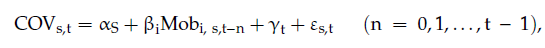

In [ ]:
model = sm.formula.ols(formula = 'GR ~ mobility_retail_and_recreation + mobility_grocery_and_pharmacy + mobility_parks + mobility_transit_stations + mobility_residential', data= df).fit()
model.summary()

In [ ]:
model = sm.formula.ols(formula = 'GR6 ~ mobility_retail_and_recreation + mobility_grocery_and_pharmacy + mobility_parks + mobility_transit_stations + mobility_residential', data= df).fit()
model.summary()

In [ ]:
# initiate df for modelling, lag n = 5
X1 = df[['mobility_retail_and_recreation',
          'mobility_grocery_and_pharmacy',	'mobility_parks',
          'mobility_transit_stations', 'mobility_workplaces',	'mobility_residential']].shift(5)
X1 = sm.add_constant(X1)
y1 = df['GR7']
mlag = sm.OLS(y1, X1, missing= 'drop')
mlag = mlag.fit()
mlag.summary()

In [4]:
# initiate df for modelling, lag n = 5
X1 = df[['mobility_retail_and_recreation',
          'mobility_parks',
          'mobility_transit_stations', 'mobility_residential']].shift(5)
X1 = sm.add_constant(X1)
y1 = df['GR7']
mlag = sm.OLS(y1, X1, missing= 'drop')
mlag = mlag.fit()
mlag.summary()

NameError: ignored

In [ ]:
model = sm.formula.ols(formula = 'GR7 ~ mobility_retail_and_recreation + mobility_grocery_and_pharmacy + mobility_transit_stations + mobility_workplaces + mobility_residential + stringency_index + school_closing + workplace_closing + restrictions_on_gatherings + stay_at_home_requirements + restrictions_on_internal_movement + international_travel_controls', data= df).fit()
model.summary()

In [3]:
X1 = df[['mobility_retail_and_recreation',
          'mobility_parks',
          'mobility_transit_stations', 'mobility_residential', 'stringency_index', 'school_closing', 'restrictions_on_gatherings', 'stay_at_home_requirements',
          'international_travel_controls']].shift(5)
X1 = sm.add_constant(X1)
y1 = df['GR7']
mlag7 = sm.OLS(y1, X1, missing= 'drop')
mlag7 = mlag7.fit()
mlag7.summary()

NameError: ignored

# ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
cfm = df[['date','new_confirmed','new_deceased','infection_rate']]
cfm.head()

,date,new_confirmed,new_deceased,infection_rate
56,2020-02-26,0.0,0.0,0.004313
57,2020-02-27,1.0,0.0,0.008174
58,2020-02-28,0.0,0.0,0.007853
59,2020-02-29,3.0,0.0,0.015075
60,2020-03-01,0.0,0.0,0.014151


In [ ]:
cfm.dtypes

date               object
new_confirmed     float64
new_deceased      float64
infection_rate    float64
dtype: object

In [ ]:
#ADF test for confirmed cases
result = adfuller(cfm['new_confirmed'], autolag = 'AIC')
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

# P-value > 0.05: non-stationary

ADF Statistic: -1.022814725553652
p-value: 0.7448524779211312
Critical Values:
	1%: -3.4471856790801514
	5%: -2.868960436182993
	10%: -2.5707229006220524


In [ ]:
#ADF test for deceased cases
result = adfuller(cfm['new_deceased'], autolag = 'AIC')
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

#p-value < 0.05: reject null hypothesis: TS stationary

ADF Statistic: -3.07338127824947
p-value: 0.028586841645258192
Critical Values:
	1%: -3.4467631030732506
	5%: -2.868774682311516
	10%: -2.570623877774392


In [ ]:
#ADF test for infection rate
result = adfuller(cfm['infection_rate'], autolag = 'AIC')
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

#p-value > 0.05

ADF Statistic: -1.9036978767469255
p-value: 0.330323517497882
Critical Values:
	1%: -3.4472291365835566
	5%: -2.8689795375849223
	10%: -2.5707330834976987


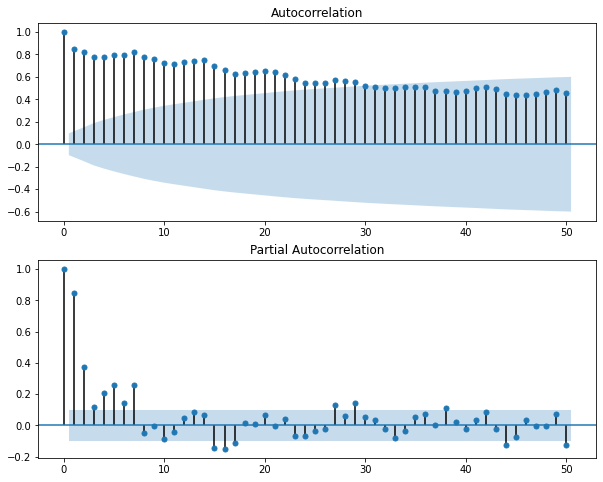

In [ ]:
#Plot ACF, PACF for confirmed cases
fig,ax = plt.subplots(2,1,figsize=(10,8))
fig = sm.graphics.tsa.plot_acf(cfm['new_confirmed'].dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(cfm['new_confirmed'].dropna(), lags=50, ax=ax[1])
plt.show()

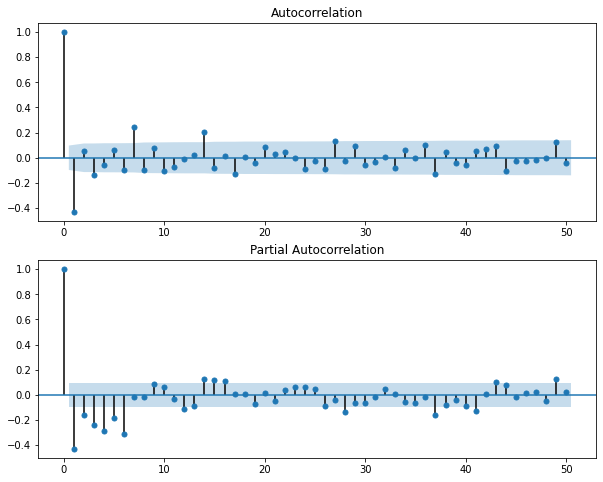

In [ ]:
#Plot ACF and PACF for first order differencing
fig,ax = plt.subplots(2,1,figsize=(10,8))
fig = sm.graphics.tsa.plot_acf(cfm['new_confirmed'].diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(cfm['new_confirmed'].diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [ ]:
#Create new attribute: Differentiated Confirmed cases
cfm['cfm_1st_diff'] = cfm['new_confirmed'].diff().dropna()
cfm.drop(cfm.index[:1], inplace=True) #drop first rows containing NaN
cfm.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,new_confirmed,new_deceased,infection_rate,cfm_1st_diff
57,2020-02-27,1.0,0.0,0.008174,1.0
58,2020-02-28,0.0,0.0,0.007853,-1.0
59,2020-02-29,3.0,0.0,0.015075,3.0
60,2020-03-01,0.0,0.0,0.014151,-3.0
61,2020-03-02,1.0,0.0,0.014737,1.0


In [ ]:
#ACF test for Differentiate Confirmed Cases
result = adfuller(train['cfm_1st_diff'], autolag = 'AIC')
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

# p-value <0.05: TS stationary

ADF Statistic: -4.1088159041370345
p-value: 0.0009365326437688096
Critical Values:
	1%: -3.4491725955218655
	5%: -2.8698334971428574
	10%: -2.5711883591836733


# ARIMA model for Confirmed cases data

In [ ]:
#split train - test 90/10
train_size = int(len(cfm) * 0.9)
train, test = cfm[0:train_size], cfm[train_size:]

In [ ]:
#Try ARIMA with Differentiated Confirmed cases data, FROM ACF AND PACF TEST CHOOSING INITIAL ORDER (7,0,2), AIC = 4053. 
# COEF OF AR LAG 7 NOT STATISTICALLY SIGNIFICANT
model_diff = ARIMA(train['cfm_1st_diff'], order=(7,0,2)).fit(disp=0)
print(model_diff.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                              ARMA Model Results                              
Dep. Variable:           cfm_1st_diff   No. Observations:                  315
Model:                     ARMA(7, 2)   Log Likelihood               -1760.092
Method:                       css-mle   S.D. of innovations             64.366
Date:                Thu, 15 Apr 2021   AIC                           3542.184
Time:                        21:18:16   BIC                           3583.462
Sample:                             0   HQIC                          3558.676
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7924      1.193      0.664      0.507      -1.546       3.131
ar.L1.cfm_1st_diff     0.3418      0.108      3.175      0.001       0.131       0.553
ar.L2.cfm_1st_diff  

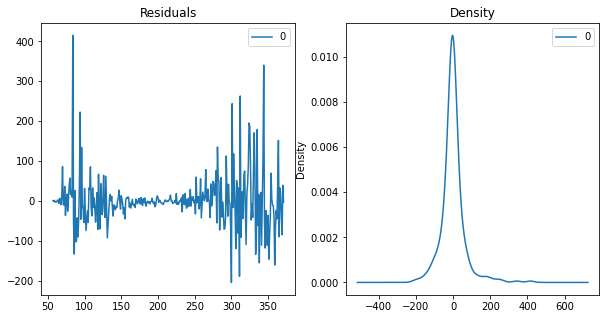

In [ ]:
# Residuals and Density plots. There exists extreme residual values (in accordance to the peak of original confirmed cases data.)
residuals = pd.DataFrame(model_diff.resid)
fig, ax = plt.subplots(1,2,figsize=(10,5))
residuals.plot(title='Residuals', ax = ax[0])
residuals.plot(kind='kde',title='Density',ax = ax[1])
plt.show()

In [ ]:
#Test ARIMA model with order combination from paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7409837/table/tblA.1/
arima = sm.tsa.statespace.SARIMAX(train['cfm_1st_diff'],order=(5,0,2)).fit()
arima.summary()

# AIC of arima = 4611 < AIC of model1 = 4120. Model1 order (3,0,0) performs better than this model.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           cfm_1st_diff   No. Observations:                  315
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -1771.418
Date:                Thu, 15 Apr 2021   AIC                           3558.837
Time:                        21:18:40   BIC                           3588.858
Sample:                             0   HQIC                          3570.831
                                - 315                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8564      0.242     -3.544      0.000      -1.330      -0.383
ar.L2         -0.1051      0.138     -0.760      0.447      -0.376       0.166
ar.L3         -0.3025      0.102     -2.962      0.003      -0.503      -0.102
ar.L4         -0.3804      0.132     -2.880      0.004      -0.639      -0.121
ar.L5         -0.0746      0.109     -0.687      0.492      -0.287       0.138
ma.L1          0.1572      0.240      0.655      0.512      -0.313       0.627
ma.L2         -0.4929      0.113     -4.380      0.000      -0.713      -0.272
sigma2      4469.7089    161.188     27.730      0.000    4153.786    4785.631
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              1332.14
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.50   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Auto-Arima model: find the best order
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model_cfm1 = pm.auto_arima(train['cfm_1st_diff'], start_p=1, start_q=1,
                      test='adf',      
                      max_p=10, max_q=10,
                      m=4,             
                      d=0,          
                      seasonal=True,  
                      start_P=0, 
                      D=None, 
                      #trace=True,
                      stationary=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_cfm1.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  315
Model:             SARIMAX(0, 0, 1)x(2, 0, [1, 2], 4)   Log Likelihood               -1773.122
Date:                                Thu, 08 Apr 2021   AIC                           3558.243
Time:                                        18:10:03   BIC                           3580.759
Sample:                                             0   HQIC                          3567.239
                                                - 315                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7460      0.027    -27.732      0.000      -0.799      -0.693
ar.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



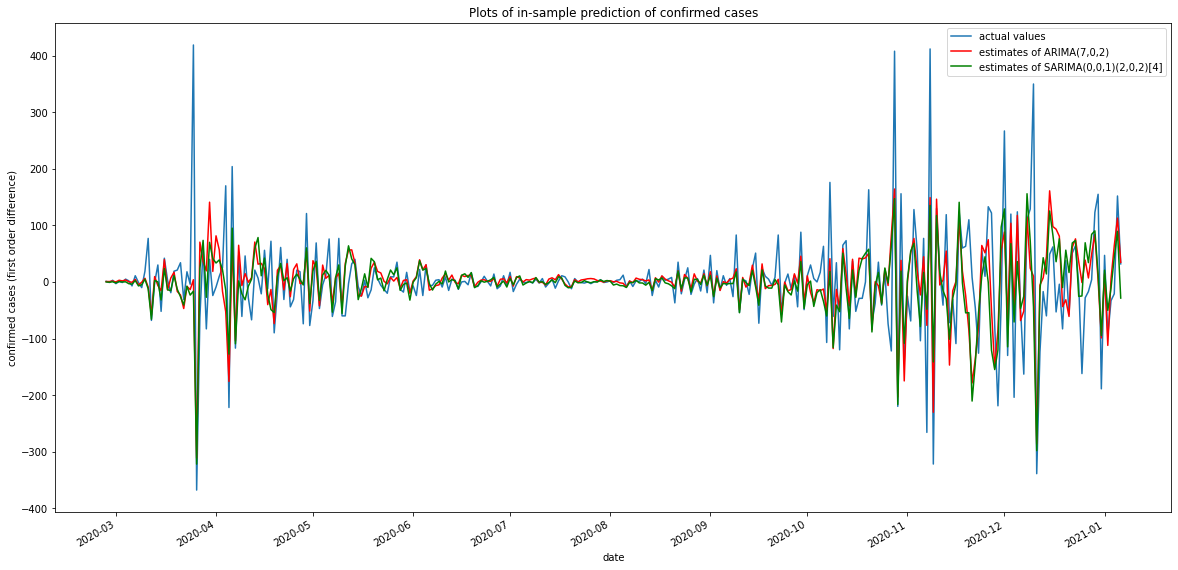

In [ ]:
train['date'] = pd.to_datetime(train['date'])
plt.figure(figsize=(20, 10))
plt.plot(train['date'],train['cfm_1st_diff'], label = "actual values")
plt.plot(train['date'], model_diff.fittedvalues, color='red', label = "estimates of ARIMA(7,0,2)")
plt.plot(train['date'], model_cfm1.predict_in_sample(train['cfm_1st_diff']), color='green', label = "estimates of SARIMA(0,0,1)(2,0,2)[4]")
plt.xlabel('date')
plt.ylabel('confirmed cases (first order difference)')
plt.title('Plots of in-sample prediction of confirmed cases')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

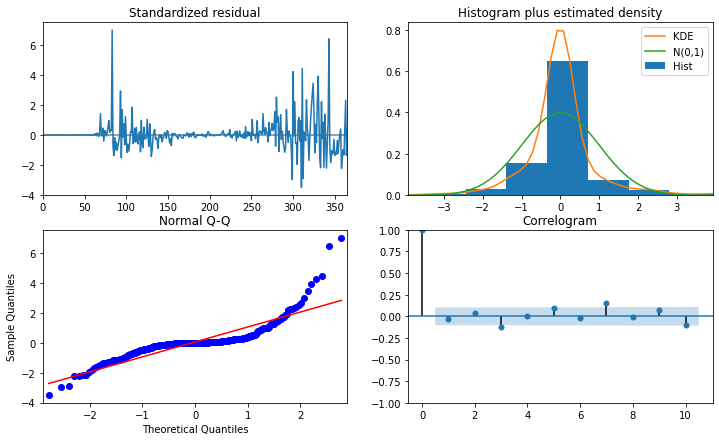

In [ ]:
model_cfm1.plot_diagnostics(figsize=(12,7))
plt.show()

#COMPARING ARIMA MODELS WITH DIFFERENT COMBINATIONS OF ORDERS
- ARIMA(7,0,2) - AIC = 4053
- ARIMA(0,3,2) - AIC = 4611
- SARIMAX(0,0,1)(2,0,2) - AIC = 4073 (m=4, d=0)


In [ ]:
# RMSE of ARIMA(7,0,2) 
from sklearn.metrics import mean_squared_error
y_pred, se, conf = model_diff.forecast(41,alpha=0.1)
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test['cfm_1st_diff'], y_pred)))

ValueError: ignored

In [ ]:
#Prediction of SARIMAX(0,0,1)(2,0,2)
preds, conf_int = model_cfm1.predict(n_periods=test.shape[0], return_conf_int=True)
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test['cfm_1st_diff'], preds)))

Test RMSE: 89.799


# ARIMA model for Deceased Cases data

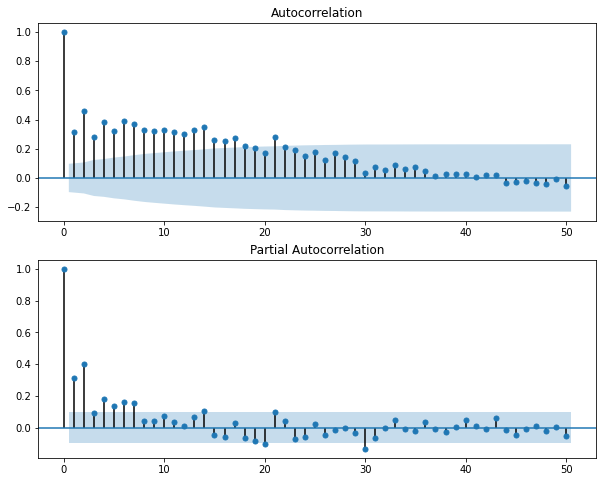

In [ ]:
#Plot ACF and PACF
fig,ax = plt.subplots(2,1,figsize=(10,8))
fig = sm.graphics.tsa.plot_acf(cfm['new_deceased'].dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(cfm['new_deceased'].dropna(), lags=50, ax=ax[1])
plt.show()

In [ ]:
model_dc = pm.auto_arima(train['new_deceased'], start_p=1, start_q=1,
                      test='adf',      
                      max_p=15, max_q=15,
                      m=1,             
                      d=0,          
                      seasonal=False,  
                      start_P=0, 
                      D=0, 
                     # trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_dc.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  315
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -822.065
Date:                Thu, 08 Apr 2021   AIC                           1660.129
Time:                        18:12:32   BIC                           1690.150
Sample:                             0   HQIC                          1672.124
                                - 315                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0089      0.017      0.532      0.595      -0.024       0.042
ar.L1          1.8846      0.127     14.841      0.000       1.636       2.133
ar.L2         -0.6594      0.160     -4.130      0.0

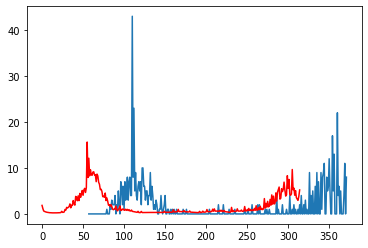

In [ ]:
train['date'] = pd.to_datetime(train['date'])
plt.figure(figsize=(20, 10))
plt.plot(train['date'],train['cfm_1st_diff'], label = "actual values")
plt.plot(train['date'], model_diff.fittedvalues, color='red', label = "estimates of ARIMA(7,0,2)")
plt.plot(train['date'], model_cfm1.predict_in_sample(train['cfm_1st_diff']), color='green', label = "estimates of SARIMA(0,0,1)(2,0,2)[4]")
plt.xlabel('date')
plt.ylabel('confirmed cases (first order difference)')
plt.title('Plots of in-sample prediction of confirmed cases')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

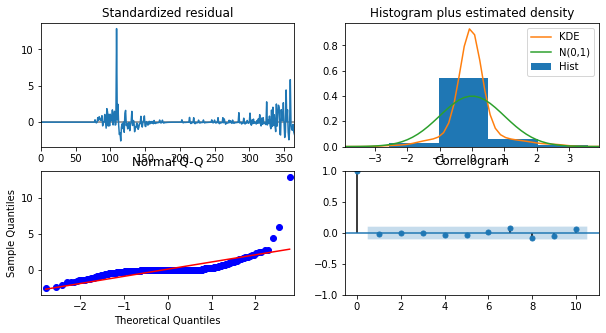

In [ ]:
model_dc.plot_diagnostics(figsize=(10,5))
plt.show()

In [ ]:
#Prediction
preds, conf_int = model_dc.predict(n_periods=test.shape[0], return_conf_int=True)
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test['new_deceased'], preds)))

Test RMSE: 3.310


# ARIMA model for Infection rate data

In [ ]:
result = adfuller(cfm['infection_rate'].diff().dropna(), autolag = 'AIC')
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.463347954032905
p-value: 0.00022890280667092164
Critical Values:
	1%: -3.447360865754795
	5%: -2.8690374364690445
	10%: -2.5707639493486636


In [ ]:
ir = df[['date','infection_rate']]

In [ ]:
#Create new attribute: Differentiated Infection Rate
ir['ir_diff'] = ir['infection_rate'].diff().dropna()
ir.drop(ir.index[:1], inplace=True) #drop first rows containing NaN
ir.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,infection_rate,ir_diff
1,2020-01-02,0.0,0.0
2,2020-01-03,0.0,0.0
3,2020-01-04,0.0,0.0
4,2020-01-05,0.0,0.0
5,2020-01-06,0.0,0.0


In [ ]:
#split train
train_size = int(len(ir) * 0.9)
train, test = ir[0:train_size], ir[train_size:]

In [ ]:
model_ir = pm.auto_arima(train['ir_diff'], start_p=1, start_q=1,
                      test='adf',      
                      max_p=15, max_q=15,
                      m=12,             
                      d=2,          
                      seasonal=True,  
                      start_P=0, 
                      D=0, 
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_ir.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  366
Model:             SARIMAX(2, 2, 1)x(2, 0, [], 12)   Log Likelihood                1461.106
Date:                             Sun, 28 Mar 2021   AIC                          -2910.212
Time:                                     08:57:40   BIC                          -2886.829
Sample:                                          0   HQIC                         -2900.919
                                             - 366                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7008      0.013    -53.523      0.000      -0.726      -0.675
ar.L2         -0.4906      

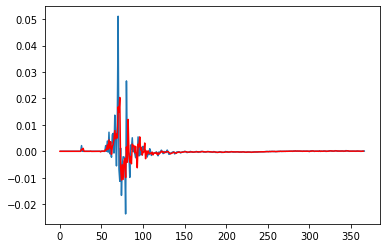

In [ ]:
plt.plot(train['ir_diff'])
plt.plot(model_ir.predict_in_sample(train['ir_diff']), color='red')

In [ ]:
#Prediction
preds, conf_int = model_dc.predict(n_periods=test.shape[0], return_conf_int=True)
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test['new_deceased'], preds)))

NameError: ignored

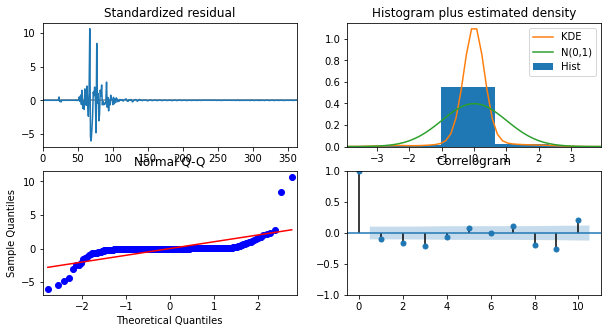

In [ ]:
model_ir.plot_diagnostics(figsize=(10,5))
plt.show()

In [ ]:
#GARCH model

In [ ]:
model = sm.formula.ols(formula = 'new_confirmed ~ mobility_parks + mobility_transit_stations + mobility_workplaces + mobility_residential', data= df2).fit()
model.summary()

In [ ]:
url = "https://sampo.thl.fi/pivot/prod/en/epirapo/covid19case/fact_epirapo_covid19case.json?column=measure/n_labtest-445356"
test = jsonNorm(url)

In [ ]:
test

### Regional test numbers

Load regional total test cases from THL


ISSUE: only weekly data available on regional level, country level daily

In [ ]:
!pip -q install pyjstat

In [ ]:
#extra imports for temporary use
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyjstat import pyjstat

In [ ]:
thl_testing_weekly = pd.read_csv(
    'https://sampo.thl.fi/pivot/prod/fi/epirapo/covid19case/fact_epirapo_covid19case.csv?row=hcdmunicipality2020-445222&column=dateweek20200101-509030&filter=measure-445356&filter=hcdmunicipality2020-445222&',
     sep=';'
     )

#thl_testing_weekly[['rand1', 'year', 'rand2', 'week']] = thl_testing_weekly['Aika'].str.split(' ', expand=True)
#thl_testing_weekly['Aika'] = thl_testing_weekly['year'] + str('-') + thl_testing_weekly['week']
#thl_testing_weekly.drop(['rand1', 'year', 'rand2', 'week'], axis=1, inplace=True)
thl_testing_weekly.sample(5)
#thl_testing_weekly = jsonNorm('https://sampo.thl.fi/pivot/prod/fi/epirapo/covid19case/fact_epirapo_covid19case.json?row=hcdmunicipality2020-445222&column=dateweek20200101-509030&filter=measure-445356&filter=hcdmunicipality2020-445222&')
#pd.json_normalize(thl_testing_weekly['dataset']['dimension'], max_level = 2)

In [ ]:
testing_url = 'https://sampo.thl.fi/pivot/prod/fi/epirapo/covid19case/fact_epirapo_covid19case.json?row=hcdmunicipality2020-445222&column=dateweek20200101-509030&filter=measure-445356&filter=hcdmunicipality2020-445222&'
testing_json = pyjstat.Dataset.read(testing_url)
testing_df = testing_json.write('tesing_dataframe')
testing_df

In [ ]:
df = pd.read_csv("bacQ.csv")
df.head()

,Unnamed: 0,year,VehicleType,Count,percentage
0,0,2012,Ambulance,1,0.001
1,1,2012,Automobile,116678,84.492
2,2,2012,Camper,4,0.003
3,3,2012,Commercial,89,0.064
4,4,2012,Cross,5,0.004


In [ ]:
#transform wide to long data
df1 = df.melt(id_vars= ['year','VehicleType'], 
        var_name= 'mobil_type',
         value_name= 'mobil_change')
mobil2.head()

In [ ]:
import plotly.express as px
fig = px.bar(df, x = "year", 
                  y = "percentage", 
                  color = "VehicleType",
              barmode = 'stack',
               #color_discrete_sequence=px.colors.qualitative.Pastel,
                  title = "abc")

fig.show()

In [ ]:
fig2=px.bar(df_stack, x='Attrition_Flag', y='Percentage',
     color='Education_Level', barmode   ='stack')
fig2.update_layout(title = "Education Level Customers' Composition", 
      xaxis_title = 'Customer Condition', yaxis_title =  
      'Percentage', width = 1600, height = 1400)
fig2.show()